<a href="https://colab.research.google.com/github/yul77/Review/blob/main/HMLLM/%ED%9C%B4%EB%A8%BC_LLM_%EC%88%98%EC%97%85_1%EC%B0%A8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자연어 처리 (NLP, Natural Language Processing) introduction

- 자연어 처리(NLP)는 컴퓨터가 인간 언어를 이해하고 생성할 수 있도록 하는 기술을 연구하는 분야로, 언어학, 컴퓨터 과학, 인공지능(AI) 기술의 교차점에 위치합니다. NLP는 다양한 언어적 과업을 수행하기 위해 다양한 알고리즘, 모델 및 기법을 사용합니다. 이러한 과업은 텍스트 데이터의 구조화, 분석, 생성 등을 포함합니다.

### 주요 기술적 과업 및 기법

1. **텍스트 전처리**
    - **토큰화(Tokenization)**: 문장을 단어, 문장 또는 어절 단위로 분리합니다. 예를 들어, "NLP is fascinating."이라는 문장은 ["NLP", "is", "fascinating", "."]으로 토큰화될 수 있습니다.

In [10]:
import nltk                                                                         # nlt를 연습할 수 있게 하는 프로그램
import numpy as np

# Ensure the punkt data is downloaded
nltk.download('punkt')

# Tokenization
text = "NLP is fascinating."
tokens = nltk.word_tokenize(text)
print("Tokens:", tokens)  # Output: ['NLP', 'is', 'fascinating', '.']

# One-hot encoding representation   ( 문자를 숫자로 인코딩 원핫 인코딩 )
vocab = sorted(set(tokens))
print("Vocabulary:", vocab)  # ['.', 'NLP', 'fascinating', 'is']

one_hot_vectors = np.eye(len(vocab))[np.array([vocab.index(token) for token in tokens])]

# Display the one-hot vectors for each token
for token, vector in zip(tokens, one_hot_vectors):
    print(f"Token: {token} -> Vector: {vector}")

Tokens: ['NLP', 'is', 'fascinating', '.']
Vocabulary: ['.', 'NLP', 'fascinating', 'is']
Token: NLP -> Vector: [0. 1. 0. 0.]
Token: is -> Vector: [0. 0. 0. 1.]
Token: fascinating -> Vector: [0. 0. 1. 0.]
Token: . -> Vector: [1. 0. 0. 0.]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Q.오타가 나면 인식을 못한다고 하는데
<span style="color:blue">그게 내가 사전에 인코딩한 문장 외의 문자를 입력하면 오류가 나는거야? 아니면 nlt 프로그램에 해당 안되는 문자를 입력했을 시 오류가 난다는거야? </span>




 LLM 수업에서 오타로 인해 인식 오류가 나는 이유는 주로 모델이 사전에 학습한 데이터와 관련이 있습니다. 두 가지 경우로 나눠서 설명할 수 있습니다:

사전에 인코딩한 문장 외의 문자 입력: 만약 학습이나 처리할 때 사용하는 데이터나 문장이 특정한 규칙이나 포맷으로 인코딩되어 있을 때, 그 규칙을 벗어난 문자가 입력되면 인식 오류나 제대로 처리가 안 될 가능성이 큽니다. 예를 들어, 기계가 처리할 수 있는 범위 밖의 특수 문자가 들어가면 문제를 일으킬 수 있습니다.

NLT(Natural Language Toolkit) 프로그램과 관련된 문제: NLTK 같은 자연어 처리 도구는 특정 언어 패턴이나 형식에 맞춰 작동합니다. 만약 프로그램이 학습하지 않은, 또는 지원하지 않는 문자가 입력되면 예상치 못한 결과나 오류가 발생할 수 있습니다. 예를 들어, 오타나 특수문자가 입력될 경우, 그 문자를 처리할 수 없어서 잘못된 결과가 나올 수 있죠.

결론적으로, 오타나 인식 불가 문자는 모델이 학습한 내용과 실제 입력값이 불일치하거나 해당 프로그램이 지원하지 않는 문자가 포함된 경우에 발생합니다.

# Q.그러면 nlt프로그램이 학습하지 않은 언어라는건 어떤게 있어?
<span style="color:blue">한국어도 오류에 포함되는건가?</span>

= NLTK(Natural Language Toolkit)는 주로 영어에 최적화된 자연어 처리 도구이지만, 다양한 언어를 지원하려는 노력도 있습니다. 하지만 한국어와 같은 언어는 영어와 구조가 다르기 때문에 몇 가지 문제가 생길 수 있습니다. 예를 들어, 영어는 띄어쓰기나 어순에 따라 의미가 달라지기 때문에 NLTK의 많은 기능이 영어를 염두에 두고 설계되었습니다.

한국어처럼 교착어(어미나 조사가 결합되는 언어)나 띄어쓰기 규칙이 영어와 다른 언어를 NLTK로 처리하려면 다음과 같은 문제가 발생할 수 있습니다:

형태소 분석의 어려움: 한국어는 조사나 어미가 중요한 역할을 하는데, NLTK는 이를 제대로 처리하지 못할 수 있습니다. 예를 들어, "가다"와 "갔다"는 다른 의미지만, NLTK가 이를 인식하지 못할 수 있습니다.

어순 문제: 영어는 고정된 어순을 따르지만, 한국어는 주어-목적어-서술어 순서가 자유롭습니다. 이런 특성을 NLTK가 정확히 인식하지 못할 가능성이 있습니다.

사전 지원 부족: NLTK는 기본적으로 영어 사전에 기반하여 동작합니다. 한국어와 같은 언어를 처리하려면 추가적인 사전, 형태소 분석기, 토크나이저가 필요합니다.

따라서 한국어도 기본적으로 NLTK의 학습 범위에 포함되지 않은 언어 중 하나라고 볼 수 있습니다. 이를 해결하려면 한국어에 특화된 다른 도구(예: KoNLPy 같은 한국어 전처리 도구)를 사용하는 것이 좋습니다. KoNLPy는 한국어 형태소 분석이나 텍스트 분류에 적합한 라이브러리입니다.

* 정규화(Normalization): 텍스트를 일관된 형식으로 변환하는 작업입니다. 예를 들어, 모든 문자를 소문자로 변환하거나, 불필요한 기호를 제거할 수 있습니다.

In [11]:
text = "NLP is fascinating!!!"
normalized_text = text.lower().replace("!!!", "")  # 느낌표를 블랭크로 대체하라는 명령어. = 느낌표를 제거하라 = 원핫인코딩을 위해 느낌표 마침표등을 제거한다.
print(normalized_text)  # Output: 'nlp is fascinating' -> text.lower() 사용하려 소문자로만 출력된다

nlp is fascinating


* 형태소 분석(Morphological Analysis): 단어의 어근, 접두사, 접미사를 분석하여 단어의 의미를 파악합니다. 예를 들어, "running"이라는 단어는 "run"이라는 어근과 "-ing" 접미사로 분해됩니다.

In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
word = "running"
stem = stemmer.stem(word)
print(stem)  # Output: 'run'  = ing가 들어간 다른 단어들을 넣어도 원형으로 출력이 된다 ex)  flying , moving 등등
             # nltk 어휘사전에 등록되어있어서 원형으로 나온다


run


* 품사 태깅(Part-of-Speech Tagging): 각 단어에 대해 문법적 품사를 지정하는 작업입니다. 예를 들어, "He is running."이라는 문장에서 "He"는 대명사(PRP), "is"는 동사(VBZ), "running"은 동명사(VBG)로 태깅됩니다.

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')
sentence = "He is running."
pos_tags = nltk.pos_tag(word_tokenize(sentence))
print(pos_tags)  # Output: [('He', 'PRP'), ('is', 'VBZ'), ('running', 'VBG')]

# 오류 맞음 - nltk에서 'word_tokenize'를 더이상 안쓰는 것 같다고 새로운 코드로 알려주시겠다고 함.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NameError: name 'word_tokenize' is not defined

In [17]:
# gpt한테 물어봐서 수정한 코드
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize # import the word_tokenize function
sentence = "He is running."
pos_tags = nltk.pos_tag(word_tokenize(sentence))
print(pos_tags)  # Output: [('He', 'PRP'), ('is', 'VBZ'), ('running', 'VBG')]

[('He', 'PRP'), ('is', 'VBZ'), ('running', 'VBG'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2. **언어 모델링(Language Modeling)**
    - **n-그램 모델**: n-그램 모델은 단어 시퀀스의 확률을 계산하는 모델입니다. 예를 들어, 2-그램(bi-gram) 모델은 두 단어 쌍의 확률을 계산합니다. "I love NLP"에서 2-그램 모델은 P("love" | "I")와 P("NLP" | "love")의 확률을 계산하여 전체 문장의 확률을 평가합니다.
    - **신경망 언어 모델**:
        - **RNN (Recurrent Neural Networks)**: 시퀀스 데이터를 처리하는 신경망으로, 이전 상태를 고려하여 다음 단어를 예측합니다. 그러나 RNN은 긴 문맥을 처리하는 데 한계가 있습니다.
        - **LSTM (Long Short-Term Memory)**: RNN의 변형으로, 장기 의존성을 처리할 수 있도록 설계되었습니다. LSTM은 "셀 상태"를 유지하며, 이전 정보가 더 오래 유지될 수 있도록 합니다.
        - **Transformer**: 자기 주의 메커니즘(Self-Attention)을 사용하는 모델로, 병렬 처리가 가능하며, 긴 문맥을 효과적으로 처리할 수 있습니다. BERT(Bidirectional Encoder Representations from Transformers)와 GPT(Generative Pre-trained Transformer)는 Transformer 아키텍처에 기반한 대표적인 모델입니다.

<span style="color:blue"> Ai 는 룰베이스를 기반으로 한다. 인공지능은 스스로 판단할 수 있어야 하고 if else까지 포함된다. </span>

<span style="color:blue">룰베이스의 한계를 극복하고자 개발된것 = 머신러닝
머신러닝 : 딥러닝,수학적알고리즘 (SVN,DT,KNN)
우리가 공부할 것은 딥러닝에 속한다. </span>


<span style="color:blue">**RNN** = 시간을 메모리에 입력한것. 단 메모리가 짧은 것이 단점. 과거에 있었던 말을 기억을 못하는 문제 발생. 한문장은 괜찮은데 문단은 처리 불가. </span>

<span style="color:blue">그래서 만들어진 알고리즘이 **LSTM** </span>





In [15]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")  # gpt2 모델로 토크나이즈 한다.
model = GPT2LMHeadModel.from_pretrained("gpt2")

input_text = "Natural language processing is"
input_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Natural language processing is a very important part of the language learning process.

The first step is to understand the language. The second step is to understand the language.

The first step is to understand the language.

The second step


<span style="color:blue"> GPT모델 = 생성을 하겠다 </span>

<span style="color:blue">특징 ->피쳐</span>

3. **정보 검색(Information Retrieval) 및 추출(Extraction)**
    - **TF-IDF (Term Frequency-Inverse Document Frequency)**: 문서 내 특정 단어의 중요성을 평가하는 기법입니다. 단어의 빈도(Term Frequency)와 해당 단어가 등장한 문서 수의 역수(Inverse Document Frequency)를 곱하여 단어의 가중치를 계산합니다.
        - **TF-IDF**는 Python의 `sklearn` 라이브러리를 사용하여 TF-IDF를 계산합니다.
            - 개념
                - **TF (Term Frequency)**: 특정 단어가 문서 내에서 얼마나 자주 등장하는지를 나타내는 값.
                - **IDF (Inverse Document Frequency)**: 특정 단어가 전체 문서 집합에서 얼마나 흔하지 않은지를 나타내는 값.
            
            TF-IDF는 단어의 중요도를 평가하여, 문서에서 자주 등장하지만 모든 문서에 공통적으로 나타나는 단어들(예: "the", "and")의 중요도를 낮추고, 특정 문서에서만 빈번하게 등장하는 단어들의 중요도를 높입니다.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 예제 문서 집합
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "자연어 처리와 컴퓨터 비전은 인공지능의 두 가지 중요한 분야입니다.",
    "컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다."
]

# TF-IDF 벡터라이저 초기화
vectorizer = TfidfVectorizer()                                                   # 토큰화

# 문서에 TF-IDF 적용
tfidf_matrix = vectorizer.fit_transform(documents)                               #특정 단어의 빈도수 분석

# 단어 리스트 출력
print("Vocabulary:", vectorizer.get_feature_names_out())

# TF-IDF 행렬 출력
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

# 특정 단어의 TF-IDF 값 출력 (예: '인공지능의')
word = '인공지능의'
word_index = vectorizer.vocabulary_.get(word)
if word_index is not None:
    print(f"\nTF-IDF value for '{word}':", tfidf_matrix[:, word_index].toarray())
else:
    print(f"'{word}' is not in the vocabulary.")

Vocabulary: ['가지' '기술입니다' '데이터를' '분야입니다' '비디오' '비전은' '이미지와' '인공지능의' '자연어' '중요한' '처리는'
 '처리와' '처리하는' '컴퓨터']
TF-IDF Matrix:
 [[0.         0.         0.         0.45985353 0.         0.
  0.         0.45985353 0.45985353 0.         0.60465213 0.
  0.         0.        ]
 [0.41197298 0.         0.         0.31331607 0.         0.31331607
  0.         0.31331607 0.31331607 0.41197298 0.         0.41197298
  0.         0.31331607]
 [0.         0.40301621 0.40301621 0.         0.40301621 0.30650422
  0.40301621 0.         0.         0.         0.         0.
  0.40301621 0.30650422]]

TF-IDF value for '인공지능의': [[0.45985353]
 [0.31331607]
 [0.        ]]


* <span style="color:blue"> 띄어쓰기 기준으로 잘라준다 .</span>
* <span style="color:blue">특징값 [[0.45985353] 이라고 나온다. </span>
* <span style="color:blue">TF-IDF로도 충분하지만 좀 더 고도화 된 작업을 할 때 BM25 사용하는 것도 괜찮다. </span>


- **TF-IDF Matrix**: 각 단어가 각 문서에서 가지는 중요도를 나타냅니다. 값이 클수록 해당 문서에서 더 중요한 단어로 간주됩니다.
- 예를 들어, `인공지능`이라는 단어의 TF-IDF 값을 확인하면, 특정 문서에서 얼마나 중요한지 알 수 있습니다.

- **BM25**: TF-IDF의 확장 버전으로, 단어의 빈도와 문서 길이를 고려하여 검색의 정확도를 높이는 정보 검색 모델입니다. **BM25는** `rank-bm25` 라이브러리를 사용하여 BM25를 계산 합니다.
    
    개념
    
    - **BM25**: TF-IDF의 개선된 버전으로, 단어의 빈도, 문서 길이, 그리고 TF와 IDF 간의 균형을 고려하여 검색 성능을 최적화한 정보 검색 알고리즘입니다. BM25는 단순 TF-IDF보다 더 정교한 방법으로 문서와 질의 간의 유사도를 측정합니다.

In [18]:
! pip install rank-bm25

from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize

# 예제 문서 집합
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "자연어 처리와 컴퓨터 비전은 인공지능의 두 가지 중요한 분야입니다.",
    "컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다."
]

# 문서를 토큰화
tokenized_documents = [word_tokenize(doc) for doc in documents]

# BM25 모델 초기화
bm25 = BM25Okapi(tokenized_documents)

# 예제 질의
query = "인공지능 분야"

# 질의를 토큰화
tokenized_query = word_tokenize(query)

# 문서들의 BM25 점수 계산
scores = bm25.get_scores(tokenized_query)

# 각 문서에 대한 BM25 점수 출력
print("BM25 Scores:", scores)

# 가장 관련성 높은 문서 출력
best_doc_index = scores.argmax()
print("\\nMost relevant document:", documents[best_doc_index])  # TF-IDF 보다 괜찮은 결과가 나온다. 협업에 가서도 이 코드 그대로 사용 가능
                                                                # 다른 문장들을 입력해서 여러가지 시도도 해볼 것

BM25 Scores: [0. 0. 0.]
\nMost relevant document: 자연어 처리는 인공지능의 한 분야입니다.


In [22]:
# 연습

! pip install rank-bm25

from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize

# 예제 문서 집합
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "자연어 처리와 컴퓨터 비전은 인공지능의 두 가지 중요한 분야입니다.",
    "컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다."
]

# 문서를 토큰화
tokenized_documents = [word_tokenize(doc) for doc in documents]

# BM25 모델 초기화
bm25 = BM25Okapi(tokenized_documents)

# 예제 질의
query = "컴퓨터"

# 질의를 토큰화
tokenized_query = word_tokenize(query)

# 문서들의 BM25 점수 계산
scores = bm25.get_scores(tokenized_query)

# 각 문서에 대한 BM25 점수 출력
print("BM25 Scores:", scores)

# 가장 관련성 높은 문서 출력
best_doc_index = scores.argmax()
print("\\nMost relevant document:", documents[best_doc_index])

BM25 Scores: [0.         0.01479238 0.01645652]
\nMost relevant document: 컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다.


- **BM25 Scores**: 각 문서가 주어진 질의와 얼마나 관련성이 있는지를 나타냅니다. 값이 클수록 해당 문서가 질의와 더 관련이 있다고 판단됩니다.
- 예제에서는 "인공지능 분야"라는 질의를 기준으로 문서들의 관련성 점수를 계산하여, 가장 관련성이 높은 문서를 출력합니다.
- **Named Entity Recognition (NER)**: 텍스트에서 사람, 장소, 조직 등 명명된 실체를 추출하는 작업입니다.

In [23]:
from transformers import pipeline

nlp = pipeline("ner")
text = "John works at OpenAI."
entities = nlp(text)
print(entities)  # Output: [{'word': 'John', 'score': 0.99, 'entity': 'PER'}, ...]

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'entity': 'I-PER', 'score': 0.99718094, 'index': 1, 'word': 'John', 'start': 0, 'end': 4}, {'entity': 'I-ORG', 'score': 0.99811625, 'index': 4, 'word': 'Open', 'start': 14, 'end': 18}, {'entity': 'I-ORG', 'score': 0.9972211, 'index': 5, 'word': '##A', 'start': 18, 'end': 19}, {'entity': 'I-ORG', 'score': 0.99710244, 'index': 6, 'word': '##I', 'start': 19, 'end': 20}]


4. **자연어 생성(NLG, Natural Language Generation)**
    - **Seq2Seq 모델**: 입력 시퀀스에서 출력 시퀀스로 변환하는 모델로, 기계 번역에서 자주 사용됩니다. 입력 문장을 받아 번역된 문장을 생성하거나 요약을 생성할 수 있습니다.
    - **Transformer 기반 생성**: GPT 시리즈와 같은 모델은 문장을 생성하는 데 사용되며, 텍스트 완성, 스토리 생성 등 다양한 응용 분야에 사용됩니다.
5. **기계 번역(Machine Translation)**
    - **통계적 기계 번역(Statistical Machine Translation, SMT)**: 문장 단위로 번역 확률을 계산하는 기법입니다. 입력 언어와 출력 언어 간의 번역 패턴을 통계적으로 학습합니다.
    - **신경망 기계 번역(Neural Machine Translation, NMT)**: Seq2Seq 모델과 Attention 메커니즘을 사용하여 문장을 번역합니다. 현재는 Transformer 기반의 NMT가 널리 사용됩니다.

<span style="color:blue"> Seq2Seq 모델 -> 번역에서 많이 사용 됨. -> 단점 보완을 위해 어텐션 알고리즘 개발
어텐션 알고리즘- > 그 문장에서 가장 중요한 키워드를 뽑아낸다.
ex) "사람이 배를 먹는다" -> 중요한 어텐션 알고리즘= "사람이""먹는다"
"먹는다"인지 "탄다"인지에 따라 배가 먹는배가 될 수도 있고 타는 배가 될 수도 있다. </span>

<span style="color:blue"> 통계적 번역의 단점을 보완하기 위해 나온것이 신경망 모델. </span>

In [24]:
from transformers import MarianMTModel, MarianTokenizer # 헬싱키(핀란드) 언어로 번역하는 프로그램. 성능이 아주 좋은편이라고 함.

model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Natural language processing is fascinating."
translated = model.generate(**tokenizer(input_text, return_tensors="pt", padding=True))
translation = tokenizer.decode(translated[0], skip_special_tokens=True)
print(translation)  # Output: 'Die Verarbeitung natürlicher Sprache ist faszinierend.'

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Natürliche Sprachverarbeitung ist faszinierend.


6. **감정 분석(Sentiment Analysis)**
    - 텍스트에서 긍정, 부정, 중립 등의 감정적 반응을 분류하는 작업입니다. 감정 분석 모델은 주로 텍스트의 어휘와 문맥 정보를 활용하여 텍스트의 감정적 상태를 예측합니다.

<span style="color:blue"> 심리상태 파악할 때 많이 쓰인다</span>

In [ ]:
nlp = pipeline("sentiment-analysis")
text = "I love NLP!"
sentiment = nlp(text)
print(sentiment)  # Output: [{'label': 'POSITIVE', 'score': 0.999}]

In [25]:
!pip install transformers

from transformers import pipeline

# 감정 분석 파이프라인 초기화
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment") # bert모델 사용

# 한국어 예제 텍스트
text = "저는 자연어 처리가 정말 좋아요!"

# 감정 분석 수행
sentiment = nlp(text)

# 결과 확인 및 출력
if sentiment[0]['label'] == '5 stars':
    print("Positive")
elif sentiment[0]['label'] == '4 stars':
    print("Positive")
elif sentiment[0]['label'] == '3 stars':
    print("Neutral")
elif sentiment[0]['label'] == '2 stars':
    print("Negative")
elif sentiment[0]['label'] == '1 star':
    print("Negative")
else:
    print("Unknown sentiment")


# 결과 출력
# print(sentiment)  # Output: [{'label': '5 stars', 'score': 0.8432925343513489}]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Positive


<span style="color:blue"> 실제로 운영할때는 댓글게시판에 사용하면 편하다.게시판 만들때 디비 테이블에 인서트 해두면 댓글 옆에 웃는 얼굴 우는 얼굴 등 자동으로 표시도 가능 </span>

In [29]:
# 연습

#!pip install transformers

from transformers import pipeline

# 감정 분석 파이프라인 초기화
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 한국어 예제 텍스트
text = "1호선 맨날 연착되는거 개짜증남"
sentiment = nlp(text)

# 결과 확인 및 출력
if sentiment[0]['label'] == '5 stars':
    print("Positive")
elif sentiment[0]['label'] == '4 stars':
    print("Positive")
elif sentiment[0]['label'] == '3 stars':
    print("Neutral")
elif sentiment[0]['label'] == '2 stars':
    print("Negative")
elif sentiment[0]['label'] == '1 star':
    print("Negative")
else:
    print("Unknown sentiment")


# 결과 출력
# 오..이것도 돌아가네 성능 좋다.

Negative


7. **문서 요약(Document Summarization)**
    - **추출적 요약(Extractive Summarization)**: 원문에서 핵심 문장을 추출하여 요약을 생성하는 방법입니다.
    - **생성적 요약(Abstractive Summarization)**: 원문을 이해하고 새로운 문장을 생성하여 요약하는 방법입니다. 이는 더 복잡하지만, 보다 자연스러운 요약을 생성할 수 있습니다.

<span style="color:blue"> 주로 자기소개서에서 유용한 편이다. 또는 개발일지 등을 쓸때도 유용함 </span>

In [30]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

article = "Natural language processing (NLP) is a field of artificial intelligence..."
inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Natural language processing (NLP) is a field of artificial intelligence. NLP is the study of how language is processed by computers. It is a form of natural language processing, or NLP, in the field of AI.


### 대규모 언어 모델(LLM, Large Language Model)의 역할

- 대규모 언어 모델(LLM)은 수십억에서 수천억 개의 매개변수를 학습하여 자연어의 복잡한 패턴을 이해하고 생성하는 모델입니다. 이 모델은 대규모의 텍스트 데이터셋을 학습하여 인간 언어의 문법적 구조와 의미적 연관성을 포괄적으로 학습할 수 있습니다.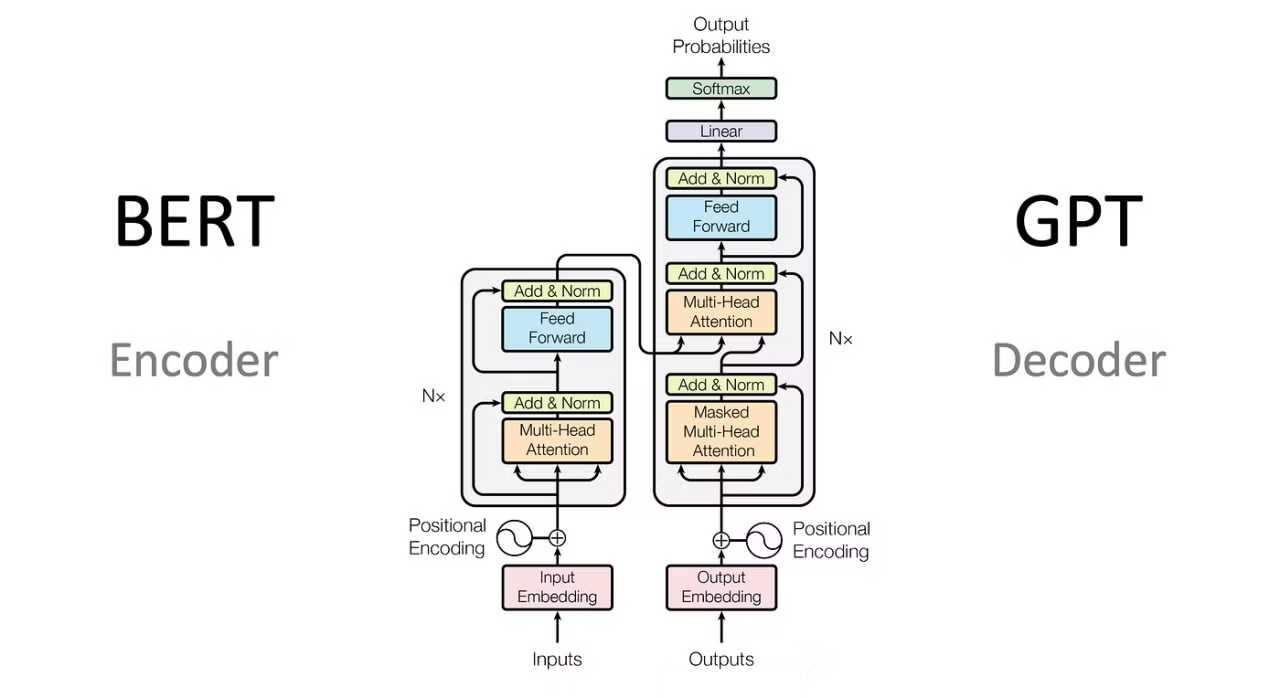

<span style="color:blue">웨이트 - 매개변수

버트 = 시스템이 이해하게 하는 시스템. 구글

지피티 = 생성 시스템. 오픈ai </span>

### 1. **Input Embedding / Output Embedding**

- **Input Embedding (BERT)**: 입력된 텍스트 데이터를 벡터로 변환하는 층입니다. 단어를 고유한 숫자 벡터로 변환하여 모델이 처리할 수 있는 형태로 만듭니다.
- **Output Embedding (GPT)**: 출력된 텍스트를 벡터로 변환하는 층입니다. BERT와 마찬가지로 텍스트를 고유한 숫자 벡터로 변환하지만, GPT에서는 디코딩 과정에서 사용됩니다.

### 2. **Positional Encoding**

- 위치 인코딩(Positional Encoding)은 단어의 순서를 나타내는 정보를 추가하는 것입니다. Transformer 모델은 순차적인 구조를 갖지 않기 때문에, 단어의 위치 정보를 명시적으로 인코딩하여 단어 순서를 학습할 수 있도록 도와줍니다.

### 3. **Multi-Head Attention**

- **Self-Attention (BERT)**: 인코더의 각 레이어에서 사용하는 메커니즘으로, 문장 내 모든 단어가 서로의 관계를 이해할 수 있도록 합니다. 여러 개의 헤드를 사용해 서로 다른 부분의 정보를 병렬로 처리하여 더 풍부한 표현을 얻을 수 있습니다.
- **Masked Multi-Head Attention (GPT)**: 디코더의 초기 단계에서 사용하는 메커니즘으로, 미래의 단어를 마스킹(masking)하여 현재의 단어만을 보고 다음 단어를 예측하게 합니다. 이로 인해 문장이 순차적으로 생성됩니다.

### 4. **Add & Norm**

- 각 레이어에서 나오는 출력에 원래의 입력을 더한 후 정규화(Normalization)를 수행하는 과정입니다. 이는 모델이 더 안정적으로 학습되도록 도와줍니다. 잔차 연결(Residual Connection)을 통해 정보가 손실되지 않고 유지될 수 있습니다.

### 5. **Feed Forward**

- 각 Attention 메커니즘 이후에 사용되는 간단한 완전 연결 신경망(Feed-Forward Neural Network, FFNN)입니다. 각 단어에 대해 독립적으로 적용되며, 비선형 변환을 통해 모델의 표현력을 높입니다. <span style="color:blue"> 출력쪽으로 전방향 나아가는 것</span>

### 6. **Linear & Softmax (GPT)**

- **Linear**: 디코더(출력)의 마지막 층에서 사용하는 선형 변환입니다. 디코더에서 생성된 벡터를 단어 예측 확률 분포로 변환하는 역할을 합니다.
- **Softmax**: 선형 변환의 결과를 바탕으로 확률 분포를 생성합니다. 각 단어에 대해 확률 값을 계산하며, 가장 높은 확률을 가진 단어가 다음 단어로 선택됩니다.

### 모델의 전반적인 설명

- **BERT (Bidirectional Encoder Representations from Transformers)**: BERT는 Transformer의 인코더(Encoder) 부분만을 사용하여 문장의 양방향 정보를 학습하는 모델입니다. 이는 자연어 이해(NLU) 작업에 매우 유용합니다.
- **GPT (Generative Pre-trained Transformer)**: GPT는 Transformer의 디코더(Decoder) 부분만을 사용하여 문장을 순차적으로 생성하는 모델입니다. 이는 자연어 생성(NLG) 작업에 강점을 가지고 있습니다.

이 구조는 BERT가 문장의 전체 문맥을 이해하는 데 중점을 두고 있으며, GPT는 주어진 단어 시퀀스에서 다음 단어를 예측하여 텍스트를 생성하는 데 중점을 두고 있다는 점에서 차이가 있습니다.

# 4. API 키 사용

1. **API 키 사용**:
    - 발급받은 API 키를 사용하여 OpenAI의 다양한 API를 호출할 수 있습니다.
    - API 요청 시, HTTP 헤더에 `Authorization` 헤더를 추가하여 API 키를 전달합니다. 예를 들어:

In [31]:
!pip install openai==0.27.0
import openai
import os

# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

# OpenAI API 키 설정
openai.api_key = " api key 입력"

def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", # api는 gpt3.5가 저렴한 편
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150, # gpt가 출력해주는 토큰수. 이 토큰수를 많이 늘려주는 딱히 좋지는 않다. 보통은 루프를 걸어주는것이 좋다.
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

# 요약 생성
summary = summarize_article(news_article)
print("Summary:", summary)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.3 MB/s eta 0:00:00
Summary: 주요 기술 기업들의 분기별 실적 발표로 주식 시장 변동 발생. 애플은 아이폰 판매와 서비스 성장으로 높은 수익 증가, 반면 알파벳은 광고 수익 감소로 주가 하락. 기술 분야의 추세 주목. 전체 시장은 혼조세, 상승과 하락 혼재.


### LLM의 기술적 역할과 기능

1. **사전 훈련과 파인튜닝**
    - **사전 훈련(Pre-training)**: 대규모 텍스트 데이터셋을 사용해 비지도 학습으로 언어의 일반적 패턴을 학습합니다. 예를 들어, GPT 모델은 다음 단어를 예측하는 작업을 통해 사전 훈련됩니다.
    - **파인튜닝(Fine-tuning)**: 사전 훈련된 모델을 특정 도메인이나 작업에 맞게 추가적으로 훈련합니다. 예를 들어, 법률 텍스트에 맞춘 파인튜닝을 통해 법률 문서 요약 모델을 생성할 수 있습니다.

  <span style="color:blue"> 파인튜닝 : 사투리를 모르면 학습시키면 되는 듯 언어를 학습시켜주는 과정 -> 옛날엔 많이 썼지만 요새는 정보 유출을 염려하여 프라이빗 LLM으로 많이 바뀌는 추세.</span>

2. **텍스트 생성**
    - **자동 완성**: 사용자가 시작한 문장을 자동으로 완성하거나 이어지는 텍스트를 생성합니다. 예를 들어, GPT-3 모델은 "The future of AI is"라는 문장을 입력하면, 미래에 대한 다양한 예측을 이어서 생성할 수 있습니다.
    - **창의적 글쓰기**: 시나리오 작성, 스토리텔링 등의 창의적 작업에 LLM이 사용될 수 있습니다.
3. **질문 답변**
    - LLM은 문맥을 이해하고 입력된 질문에 대해 적절한 답변을 생성합니다. 예를 들어, "What are the benefits of natural language processing?"이라는 질문에 대한 구체적인 응답을 생성할 수 있습니다.
4. **텍스트 요약 및 번역**
    - LLM은 입력 텍스트의 요약본을 생성하거나, 다른 언어로의 번역을 수행합니다. 이는 다국어 모델의 경우 더 효과적으로 작동할 수 있습니다
     <span style="color:blue"> 예를 들어 논문의 특정 수식을 이용하면 그 논문에 대한 설명을 해준다 </span>

<span style="color:blue"> 파인튜닝 : 사투리를 모르면 학습시키면 되는 듯 언어를 학습시켜주는 과정 -> 옛날엔 많이 썼지만 요새는 정보 유출을 염려하여 프라이빗 LLM으로 많이 바뀌는 추세.</span>



# 예제: GPT-3를 사용한 질문 답변

In [ ]:
import openai

openai.api_key = "your-openai-api-key"

def ask_gpt3.5(question):
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=question,
        max_tokens=150
    )
    return response.choices[0].text.strip()

question = "What are the benefits of natural language processing?"
answer = ask_gpt3.5(question)
print(answer)

### LLM의 한계와 도전 과제

1. **편향성(Bias)**:
    - LLM은 학습된 데이터셋에 내재된 사회적, 문화적 편향성을 반영할 수 있습니다. 이는 특정 그룹에 대한 편향된 출력을 생성할 가능성을 증가시킵니다.
2. **사실적 정확성(Factual Accuracy)**:
    - LLM은 가끔 잘못된 정보를 생성할 수 있습니다. 모델은 언어 패턴을 학습하지만, 실제 사실과 다른 문장을 생성할 수 있는 위험이 있습니다.
3. **계산 자원 요구**:
    - LLM의 훈련 및 추론에는 막대한 계산 자원이 필요합니다. 이는 환경적 비용을 초래하며, 이러한 모델을 배포하는 데 상당한 인프라가 요구됩니다.
4. **모델 해석 가능성(Interpretability)**:
    - LLM은 내부 작동 원리를 이해하기 어려운 블랙박스 모델입니다. 이는 모델이 왜 특정 출력을 생성하는지 설명하는 데 어려움을 초래합니다.

### 예제 1

> 뉴스 기사를 수집하여 토큰화, 품사 태깅, 개체명 인식 등의 NLP기초 작업을 수행한 후, LLM을 사용해 기사의 핵심 내용을 요약, Python의 NLTK 또는 SpaCy 라이브러리를 활용하여 텍스트 전처리 작업을 수행하고, OpenAI GPT 모델을 사용하여 자동 요약을 생성.
>

In [33]:
# 필요한 라이브러리 설치

!pip install nltk spacy openai
!python -m spacy download ko_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2. 한국어 뉴스 기사 수집

여기서는 예제로 한국어 뉴스 기사를 텍스트로 입력합니다. 실제 애플리케이션에서는 웹 스크래핑 또는 API를 사용하여 기사를 수집할 수 있습니다.

In [34]:
# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

### 3. 텍스트 전처리 작업 수행

### 3.1. NLTK를 사용한 토큰화 및 품사 태깅

In [35]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# NLTK 다운로드 (최초 실행 시)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 문장 토큰화
sentences = sent_tokenize(news_article)
print("Sentences:", sentences)

# 단어 토큰화 및 품사 태깅 (한국어는 spaCy로 더 효과적이지만, 여기서는 NLTK로 예시를 보여줍니다.)
words = word_tokenize(news_article)
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

Sentences: ['\n오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.', '애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.', '반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.', '투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.', '전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.']
POS Tags: [('오늘', 'JJ'), ('주식', 'NNP'), ('시장은', 'NNP'), ('주요', 'NNP'), ('기술', 'NNP'), ('기업들이', 'NNP'), ('분기별', 'NNP'), ('실적', 'NNP'), ('보고서를', 'NNP'), ('발표하면서', 'NNP'), ('큰', 'NNP'), ('변동을', 'NNP'), ('보였다', 'NNP'), ('.', '.'), ('애플은', 'VB'), ('아이폰', 'JJ'), ('판매와', 'NNP'), ('서비스', 'NNP'), ('부문의', 'NNP'), ('성장에', 'NNP'), ('힘입어', 'NNP'), ('예상보다', 'NNP'), ('높은', 'NNP'), ('수익', 'NNP'), ('증가를', 'NNP'), ('보고했다', 'NNP'), ('.', '.'), ('반면', 'VB'), ('구글의', 'JJ'), ('모회사인', 'NNP'), ('알파벳은', 'NNP'), ('광고', 'NNP'), ('수익이', 'NNP'), ('감소하여', 'NNP'), ('주가가', 'NNP'), ('하락했다', 'NNP'), ('.', '.'), ('투자자들은', 'VB'), ('이러한', 'JJ'), ('상황이', 'NNP'), ('기술', 'NNP'), ('분야의', 'NNP'), ('광범위한', 'NNP'), ('추세를', 'NNP'), ('나타낼', 'NNP'), ('수', 'NNP'),

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 3.2. SpaCy를 사용한 개체명 인식(NER)

In [36]:
import spacy

# SpaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

# 텍스트 분석
doc = nlp(news_article)

# 개체명 인식
for ent in doc.ents:
    print(ent.text, ent.label_)

오늘 DT
애플은 OG
구글의 OG


### 4. OpenAI GPT-3.5 Turbo 모델을 사용한 요약 생성

### 4.1. OpenAI API Key 설정

In [ ]:
!pip install openai==0.27.0
import openai
import os

# OpenAI API 키 설정
openai.api_key = "your-openai-api-key-here"

# 4.2. 요약 생성

In [37]:
def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150,
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

# 요약 생성
summary = summarize_article(news_article)
print("Summary:", summary)

Summary: 주요 기술 기업의 분기별 실적 발표로 주식 시장이 변동했습니다. 애플은 아이폰 판매와 서비스 부문의 성장으로 높은 수익 증가를 보고했지만, 알파벳은 광고 수익이 감소하여 주가가 하락했습니다. 이에 투자자들은 기술 분야의 추세를 주목하고 있으며, 전체 시장은 혼조세를 보였


# 5. 전체 코드 정리

In [38]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import spacy
import openai

# NLTK 다운로드 (최초 실행 시)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# SpaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

# OpenAI API 키 설정
#openai.api_key = "your-openai-api-key-here"

# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

# 1. 문장 토큰화
sentences = sent_tokenize(news_article)
print("Sentences:", sentences)

# 2. 단어 토큰화 및 품사 태깅 (영어 기반으로 설명을 보여주기 위해 예시를 유지)
words = word_tokenize(news_article)
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

# 3. 개체명 인식(NER)
doc = nlp(news_article)
for ent in doc.ents:
    print(ent.text, ent.label_)

# 4. 요약 생성
def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150,
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

summary = summarize_article(news_article)
print("Summary:", summary)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Sentences: ['\n오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.', '애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.', '반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.', '투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.', '전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.']
POS Tags: [('오늘', 'JJ'), ('주식', 'NNP'), ('시장은', 'NNP'), ('주요', 'NNP'), ('기술', 'NNP'), ('기업들이', 'NNP'), ('분기별', 'NNP'), ('실적', 'NNP'), ('보고서를', 'NNP'), ('발표하면서', 'NNP'), ('큰', 'NNP'), ('변동을', 'NNP'), ('보였다', 'NNP'), ('.', '.'), ('애플은', 'VB'), ('아이폰', 'JJ'), ('판매와', 'NNP'), ('서비스', 'NNP'), ('부문의', 'NNP'), ('성장에', 'NNP'), ('힘입어', 'NNP'), ('예상보다', 'NNP'), ('높은', 'NNP'), ('수익', 'NNP'), ('증가를', 'NNP'), ('보고했다', 'NNP'), ('.', '.'), ('반면', 'VB'), ('구글의', 'JJ'), ('모회사인', 'NNP'), ('알파벳은', 'NNP'), ('광고', 'NNP'), ('수익이', 'NNP'), ('감소하여', 'NNP'), ('주가가', 'NNP'), ('하락했다', 'NNP'), ('.', '.'), ('투자자들은', 'VB'), ('이러한', 'JJ'), ('상황이', 'NNP'), ('기술', 'NNP'), ('분야의', 'NNP'), ('광범위한', 'NNP'), ('추세를', 'NNP'), ('나타낼', 'NNP'), ('수', 'NNP'),

### 연습문제 1: 문장 토큰화와 단어 토큰화

- **문제:** 주어진 한국어 뉴스 기사에서 문장 토큰화와 단어 토큰화를 각각 수행하고, 토큰화된 문장과 단어 리스트를 출력하세요. 또한, 각각의 문장에서 몇 개의 단어가 있는지 출력하세요.
    
    ```python
    from nltk.tokenize import word_tokenize, sent_tokenize
    
    # 예제 한국어 뉴스 기사 텍스트
    news_article = """
    오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
    애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
    반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
    투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
    전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
    """
    
    # 문장 토큰화
    sentences = sent_tokenize(news_article)
    print("Sentences:", sentences)
    
    # 단어 토큰화 및 각 문장의 단어 개수 출력
    for i, sentence in enumerate(sentences):
        words = word_tokenize(sentence)
        print(f"Sentence {i+1}: {words}")
        print(f"Number of words in Sentence {i+1}: {len(words)}")
    ```
    

### 연습문제 2: 품사 태깅

- **문제:** NLTK를 사용하여 뉴스 기사 텍스트의 각 단어에 대해 품사 태깅을 수행하세요. 그 결과를 출력하고, 주어(명사)와 동사만 출력해 보세요.
    
    ```python
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    
    nltk.download('averaged_perceptron_tagger')
    
    # 단어 토큰화
    words = word_tokenize(news_article)
    
    # 품사 태깅
    pos_tags = pos_tag(words)
    print("POS Tags:", pos_tags)
    
    # 주어(명사)와 동사만 출력
    nouns_and_verbs = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('V')]
    print("Nouns and Verbs:", nouns_and_verbs)
    ```
    

### 연습문제 3: 개체명 인식(NER)

- **문제:** SpaCy를 사용하여 주어진 뉴스 기사에서 개체명 인식(NER)을 수행하세요. 기사에서 언급된 모든 개체명과 그 유형을 출력하세요.
    
    ```python
    import spacy
    
    # SpaCy 한국어 모델 로드
    nlp = spacy.load("ko_core_news_sm")
    
    # 텍스트 분석
    doc = nlp(news_article)
    
    # 개체명 인식
    for ent in doc.ents:
        print(ent.text, ent.label_)
    ```
    

### 연습문제 4: 요약 생성

- **문제:** GPT-3.5 Turbo 모델을 사용하여 주어진 한국어 뉴스 기사의 요약을 생성하세요. 요약된 내용을 출력하세요.
    
    ```python
    import openai
    
    # OpenAI API 키 설정
    openai.api_key = "your-openai-api-key-here"
    
    # 요약 생성 함수
    def summarize_article(article):
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
            ],
            max_tokens=150,
            temperature=0.5
        )
        summary = response.choices[0].message['content'].strip()
        return summary
    
    summary = summarize_article(news_article)
    print("Summary:", summary)
    ```
    

### 연습문제 5: 사용자 입력에 따른 뉴스 요약

- **문제:** 사용자가 임의의 한국어 뉴스 기사를 입력할 수 있게 하고, 입력된 기사를 토큰화, 품사 태깅 및 요약하는 프로그램을 작성하세요. 사용자가 직접 입력한 뉴스 기사를 요약된 형태로 출력하세요.
    
    ```python
    import nltk
    import spacy
    import openai
    
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    
    nlp = spacy.load("ko_core_news_sm")
    openai.api_key = "your-openai-api-key-here"
    
    # 사용자 입력 뉴스 기사
    news_article = input("요약할 한국어 뉴스 기사를 입력하세요:\\n")
    
    # 문장 토큰화
    sentences = nltk.sent_tokenize(news_article)
    print("Sentences:", sentences)
    
    # 단어 토큰화 및 품사 태깅
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        print("POS Tags:", pos_tags)
    
    # 개체명 인식(NER)
    doc = nlp(news_article)
    for ent in doc.ents:
        print(ent.text, ent.label_)
    
    # 요약 생성
    summary = summarize_article(news_article)
    print("Summary:", summary)
    ```